# Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

##  Instructions


    This file contains code that helps you get started on the
    linear exercise. You will need to complete the following functions
    in this exericse:

     lrCostFunction.m (logistic regression cost function)
     oneVsAll.m
     predictOneVsAll.m
     predict.m

    For this exercise, you will not need to change any code in this file,
    or any other files other than those mentioned above.



In [8]:
%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data
    We start the exercise by first loading and visualizing the dataset.
    You will be working with a dataset that contains handwritten digits.

Loading and Visualizing Data ...
Program paused. Press enter to continue.


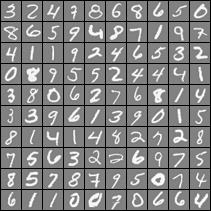

In [9]:
% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

fprintf('Program paused. Press enter to continue.\n');
%pause;

## Part 2a: Vectorize Logistic Regression
    In this part of the exercise, you will reuse your logistic regression
    code from the last exercise. You task here is to make sure that your
    regularized logistic regression implementation is vectorized. After
    that, you will implement one-vs-all classification for the handwritten
    digit dataset.

In [12]:
% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');

fprintf('Program paused. Press enter to continue.\n');
%pause;


Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Program paused. Press enter to continue.
Testing lrCostFunction() with regularization


## Part 2b: One-vs-All Training

In [24]:
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

fprintf('Program paused. Press enter to continue.\n');
%pause;


Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.382626e-02
Iteration    50 | Cost: 5.725248e-02
Iteration    50 | Cost: 6.310662e-02
Iteration    50 | Cost: 3.644332e-02
Iteration    50 | Cost: 6.186295e-02
Iteration    50 | Cost: 2.172860e-02
Iteration    50 | Cost: 3.414857e-02
Iteration    50 | Cost: 8.588242e-02
Iteration    50 | Cost: 8.022990e-02
Iteration    50 | Cost: 1.000504e-02
Program paused. Press enter to continue.


## Part 3: Predict for One-Vs-All

In [43]:
pred = predictOneVsAll(all_theta, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

ans =

 Columns 1 through 6:

   5.1346e-10   1.6977e-06   8.3233e-01   2.5714e-09   7.5755e-01   9.3636e-08
   2.8485e-09   6.3713e-01   3.0104e-04   9.2637e-01   4.0492e-06   1.6807e-04
   4.1866e-08   2.4616e-02   2.7261e-05   9.9990e-01   1.0259e-02   2.3689e-04
   2.4344e-08   6.5249e-06   7.0168e-04   9.9961e-01   3.0882e-08   8.1107e-05
   4.8628e-05   9.6714e-05   3.2526e-02   9.7214e-01   1.0211e-02   5.4342e-05
   4.2925e-03   4.1707e-06   1.4666e-03   4.5346e-01   6.0306e-03   1.2875e-03
   3.0017e-07   3.4930e-07   1.3522e-03   9.9968e-01   8.8601e-06   2.2282e-06
   7.1103e-14   6.4772e-03   9.6269e-10   7.1740e-01   2.5382e-09   2.2668e-04
   8.8281e-04   7.0750e-04   7.2588e-04   9.5651e-01   9.7050e-03   1.1712e-04
   1.5753e-17   2.4378e-01   2.1239e-09   7.5764e-01   7.6240e-04   3.8129e-04
   5.5446e-12   1.5362e-04   3.2455e-09   9.9845e-01   1.1591e-03   1.8427e-05

 Columns 7 through 10:

   1.1075e-06   4.2704e-03   1.8628e-03   6.9726e-05
   7.8434e-02   4.0427e